# I/O Performance for fixed array sizes

```python
testnames = ["test_large_fraction_changes_sparse", 
             "test_mostly_appends_sparse", 
             "test_small_fraction_changes_sparse", 
             "test_mostly_appends_dense"]
```

In [35]:
path = "/home/melissa/projects/versioned-hdf5"

In [36]:
%matplotlib inline
import os
import sys
sys.path.append('..')
import time
import numpy as np
import matplotlib.pyplot as plt
import h5py
import datetime
from versioned_hdf5 import VersionedHDF5File
from generate_data_deterministic import TestVersionedDatasetPerformance

# Test 1: Large Fraction Changes (Sparse)

## Creating files

In [37]:
testname = "test_large_fraction_changes_sparse"
num_transactions = [50, 100, 500, 1000]
num_rows_initial = 5000

Create new file with `num_transactions` versions:

In [38]:
def time_create(n):
    t0 = time.time()
    TestVersionedDatasetPerformance().test_large_fraction_changes_sparse(n)
    t = time.time()-t0
    return t

In [39]:
times = []
for n in num_transactions:
    times.append(time_create(n))

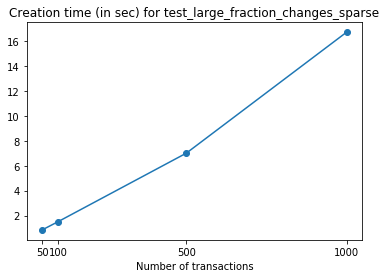

In [40]:
%matplotlib inline
plt.plot(num_transactions, times, 'o-')
plt.xticks(num_transactions)
plt.title("Creation time (in sec) for test_large_fraction_changes_sparse")
plt.xlabel("Number of transactions")
plt.show()

In [41]:
tests = []
for n in num_transactions:
    filename = f"{testname}_{n}.h5"
    h5pyfile = h5py.File(filename, 'r+')
    vfile = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=n, filename=filename, h5pyfile=h5pyfile, vfile=vfile))

## Adding new version to existing set

In [42]:
def add_version(vfile):
    tt = datetime.datetime.utcnow()
    with vfile.stage_version(str(tt)) as group:
        key0 = group.create_dataset(testname + '/key0', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        key1 = group.create_dataset(testname + '/key1', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        val = group.create_dataset(testname + '/val', data=np.random.rand(num_rows_initial), dtype=(np.dtype('float64')))

In [43]:
for test in tests:
    t0 = time.time()
    add_version(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.03763604164123535 seconds.
File with 100 versions: 0.035828590393066406 seconds.
File with 500 versions: 0.03997159004211426 seconds.
File with 1000 versions: 0.04395580291748047 seconds.


In [44]:
for test in tests:
    test['h5pyfile'].close()

## Reading in sequential mode

In [45]:
for test in tests:
    test['h5pyfile'] = h5py.File(filename, 'r')
    test['vfile'] = VersionedHDF5File(test['h5pyfile'])

In [46]:
def read_data(vfile):
    for vname in vfile._versions:
        if vname != '__first_version__':
            version = vfile[vname]
            group_key = list(version.keys())[0]
            val = version[group_key]['val']

In [49]:
for test in tests:
    t0 = time.time()
    read_data(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.9922757148742676 seconds.
File with 100 versions: 1.0571331977844238 seconds.
File with 500 versions: 1.0348639488220215 seconds.
File with 1000 versions: 0.9935817718505859 seconds.


## Reading specific version

In [50]:
def read_version(vfile):
    N = len(vfile._versions.keys())
    index = np.random.randint(0, N)
    vname = list(vfile._versions.keys())[index]
    return vname

In [51]:
for test in tests:
    vname = read_version(test['vfile'])
    if vname != '__first_version__':
        t0 = time.time()
        version = test['vfile'][vname]
        group_key = list(version.keys())[0]
        val = version[group_key]['val']
        t = time.time()-t0
        print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.0016865730285644531 seconds.
File with 100 versions: 0.0015861988067626953 seconds.
File with 500 versions: 0.0012612342834472656 seconds.
File with 1000 versions: 0.00164031982421875 seconds.


## Finishing up

In [52]:
for test in tests:
    test['h5pyfile'].close()

# Test 2: Mostly appends (Sparse)

## Creating files

In [53]:
testname = "test_mostly_appends_sparse"
num_transactions = [50, 100, 200]
num_rows_initial = 1000

Create new file with `num_transactions` versions:

In [54]:
def time_create(n):
    t0 = time.time()
    TestVersionedDatasetPerformance().test_mostly_appends_sparse(n)
    t = time.time()-t0
    return t

In [55]:
times = []
for n in num_transactions:
    times.append(time_create(n))

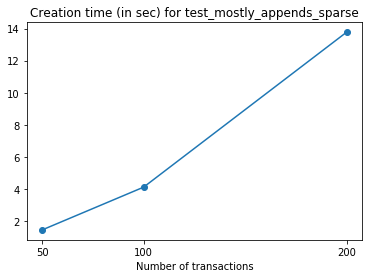

In [56]:
%matplotlib inline
plt.plot(num_transactions, times, 'o-')
plt.xticks(num_transactions)
plt.title("Creation time (in sec) for test_mostly_appends_sparse")
plt.xlabel("Number of transactions")
plt.show()

In [57]:
tests = []
for n in num_transactions:
    filename = f"{testname}_{n}.h5"
    h5pyfile = h5py.File(filename, 'r+')
    vfile = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=n, filename=filename, h5pyfile=h5pyfile, vfile=vfile))

## Adding new version to existing set

In [58]:
def add_version(vfile):
    tt = datetime.datetime.utcnow()
    with vfile.stage_version(str(tt)) as group:
        key0 = group.create_dataset(testname + '/key0', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        key1 = group.create_dataset(testname + '/key1', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        val = group.create_dataset(testname + '/val', data=np.random.rand(num_rows_initial), dtype=(np.dtype('float64')))

In [59]:
for test in tests:
    t0 = time.time()
    add_version(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.041077613830566406 seconds.
File with 100 versions: 0.06636476516723633 seconds.
File with 200 versions: 0.08954167366027832 seconds.


In [60]:
for test in tests:
    test['h5pyfile'].close()

## Reading in sequential mode

In [61]:
for test in tests:
    test['h5pyfile'] = h5py.File(filename, 'r')
    test['vfile'] = VersionedHDF5File(test['h5pyfile'])

In [62]:
def read_data(vfile):
    for vname in vfile._versions:
        if vname != '__first_version__':
            version = vfile[vname]
            group_key = list(version.keys())[0]
            val = version[group_key]['val']

In [63]:
for test in tests:
    t0 = time.time()
    read_data(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.5233075618743896 seconds.
File with 100 versions: 0.4514915943145752 seconds.
File with 200 versions: 0.44855737686157227 seconds.


## Reading specific version

In [64]:
def read_version(vfile):
    N = len(vfile._versions.keys())
    index = np.random.randint(0, N)
    vname = list(vfile._versions.keys())[index]
    return vname

In [65]:
for test in tests:
    vname = read_version(test['vfile'])
    if vname != '__first_version__':
        t0 = time.time()
        version = test['vfile'][vname]
        group_key = list(version.keys())[0]
        val = version[group_key]['val']
        t = time.time()-t0
        print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.0012028217315673828 seconds.
File with 100 versions: 0.002414226531982422 seconds.
File with 200 versions: 0.0021195411682128906 seconds.


## Finishing up

In [66]:
for test in tests:
    test['h5pyfile'].close()

# Test 3: Small Fraction Changes (Sparse)

## Creating files

In [67]:
testname = "test_small_fraction_changes_sparse"
num_transactions = [50, 100, 500, 1000]
num_rows_initial = 5000

Create new file with `num_transactions` versions:

In [68]:
def time_create(n):
    t0 = time.time()
    TestVersionedDatasetPerformance().test_small_fraction_changes_sparse(n)
    t = time.time()-t0
    return t

In [69]:
times = []
for n in num_transactions:
    times.append(time_create(n))

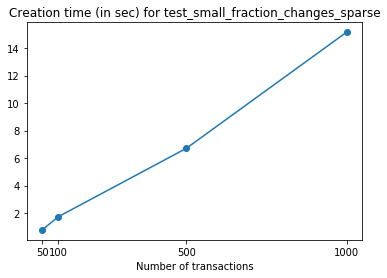

In [70]:
%matplotlib inline
plt.plot(num_transactions, times, 'o-')
plt.xticks(num_transactions)
plt.title("Creation time (in sec) for test_small_fraction_changes_sparse")
plt.xlabel("Number of transactions")
plt.show()

In [71]:
tests = []
for n in num_transactions:
    filename = f"{testname}_{n}.h5"
    h5pyfile = h5py.File(filename, 'r+')
    vfile = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=n, filename=filename, h5pyfile=h5pyfile, vfile=vfile))

## Adding new version to existing set

In [72]:
def add_version(vfile):
    tt = datetime.datetime.utcnow()
    with vfile.stage_version(str(tt)) as group:
        key0 = group.create_dataset(testname + '/key0', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        key1 = group.create_dataset(testname + '/key1', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        val = group.create_dataset(testname + '/val', data=np.random.rand(num_rows_initial), dtype=(np.dtype('float64')))

In [73]:
for test in tests:
    t0 = time.time()
    add_version(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.03450512886047363 seconds.
File with 100 versions: 0.04645848274230957 seconds.
File with 500 versions: 0.04752182960510254 seconds.
File with 1000 versions: 0.04432225227355957 seconds.


In [74]:
for test in tests:
    test['h5pyfile'].close()

## Reading in sequential mode

In [75]:
for test in tests:
    test['h5pyfile'] = h5py.File(filename, 'r')
    test['vfile'] = VersionedHDF5File(test['h5pyfile'])

In [76]:
def read_data(vfile):
    for vname in vfile._versions:
        if vname != '__first_version__':
            version = vfile[vname]
            group_key = list(version.keys())[0]
            val = version[group_key]['val']

In [77]:
for test in tests:
    t0 = time.time()
    read_data(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 1.137399673461914 seconds.
File with 100 versions: 1.0572412014007568 seconds.
File with 500 versions: 1.4921236038208008 seconds.
File with 1000 versions: 1.2177979946136475 seconds.


## Reading specific version

In [78]:
def read_version(vfile):
    N = len(vfile._versions.keys())
    index = np.random.randint(0, N)
    vname = list(vfile._versions.keys())[index]
    return vname

In [79]:
for test in tests:
    vname = read_version(test['vfile'])
    if vname != '__first_version__':
        t0 = time.time()
        version = test['vfile'][vname]
        group_key = list(version.keys())[0]
        val = version[group_key]['val']
        t = time.time()-t0
        print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.0020127296447753906 seconds.
File with 100 versions: 0.001575469970703125 seconds.
File with 500 versions: 0.0014884471893310547 seconds.
File with 1000 versions: 0.0016641616821289062 seconds.


## Finishing up

In [80]:
for test in tests:
    test['h5pyfile'].close()

# Test 4: Mostly appends (Dense)

## Creating files

In [81]:
testname = "test_mostly_appends_dense"
num_transactions = [50, 100, 200]
num_rows_initial = 30

Create new file with `num_transactions` versions:

In [82]:
def time_create(n):
    t0 = time.time()
    TestVersionedDatasetPerformance().test_mostly_appends_dense(n)
    t = time.time()-t0
    return t

In [83]:
times = []
for n in num_transactions:
    times.append(time_create(n))

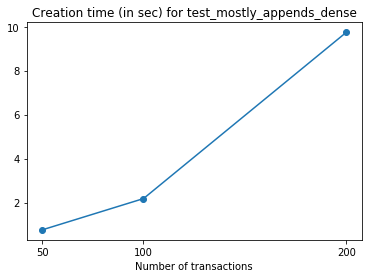

In [84]:
%matplotlib inline
plt.plot(num_transactions, times, 'o-')
plt.xticks(num_transactions)
plt.title("Creation time (in sec) for test_mostly_appends_dense")
plt.xlabel("Number of transactions")
plt.show()

In [85]:
tests = []
for n in num_transactions:
    filename = f"{testname}_{n}.h5"
    h5pyfile = h5py.File(filename, 'r+')
    vfile = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=n, filename=filename, h5pyfile=h5pyfile, vfile=vfile))

## Adding new version to existing set

In [86]:
def add_version(vfile):
    tt = datetime.datetime.utcnow()
    with vfile.stage_version(str(tt)) as group:
        key0 = group.create_dataset(testname + '/key0', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        key1 = group.create_dataset(testname + '/key1', data=np.random.rand(num_rows_initial), dtype=(np.dtype('int64')))
        val = group.create_dataset(testname + '/val', data=np.random.rand(num_rows_initial), dtype=(np.dtype('float64')))

In [87]:
for test in tests:
    t0 = time.time()
    add_version(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.03444337844848633 seconds.
File with 100 versions: 0.05429339408874512 seconds.
File with 200 versions: 0.06975698471069336 seconds.


In [88]:
for test in tests:
    test['h5pyfile'].close()

## Reading in sequential mode

In [89]:
for test in tests:
    test['h5pyfile'] = h5py.File(filename, 'r')
    test['vfile'] = VersionedHDF5File(test['h5pyfile'])

In [90]:
def read_data(vfile):
    for vname in vfile._versions:
        if vname != '__first_version__':
            version = vfile[vname]
            group_key = list(version.keys())[0]
            val = version[group_key]['val']

In [91]:
for test in tests:
    t0 = time.time()
    read_data(test['vfile'])
    t = time.time()-t0
    print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.6910874843597412 seconds.
File with 100 versions: 0.6245694160461426 seconds.
File with 200 versions: 1.111159324645996 seconds.


## Reading specific version

In [92]:
def read_version(vfile):
    N = len(vfile._versions.keys())
    index = np.random.randint(0, N)
    vname = list(vfile._versions.keys())[index]
    return vname

In [93]:
for test in tests:
    vname = read_version(test['vfile'])
    if vname != '__first_version__':
        t0 = time.time()
        version = test['vfile'][vname]
        group_key = list(version.keys())[0]
        val = version[group_key]['val']
        t = time.time()-t0
        print(f"File with {test['num_transactions']} versions: {t} seconds.")

File with 50 versions: 0.002668619155883789 seconds.
File with 100 versions: 0.0043447017669677734 seconds.
File with 200 versions: 0.006675004959106445 seconds.


## Finishing up

In [94]:
for test in tests:
    test['h5pyfile'].close()